# Bepaling van warmtecapaciteit van een onbekend materiaal


# Introductie

Onbekende materialen kunnen geïdentificeerd worden door hun eigenschappen te meten. Een van deze eigenschappen is de warmtecapaciteit. In dit practicum gaan we de warmtecapaciteit van een onbekend materiaal bepalen door middel van een calorimeter experiment. Daarbij wordt een bepaalde massa van het materiaal naar een bekende temperatuur gebracht waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaatst. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend.

# Theorie

De soortelijke warmte $c$ van een materiaal is gedefinieerd als de hoeveelheid warmte $Q$ die nodig is om de temperatuur $T$ van een kilogram van het materiaal met één graad Celsius (of één Kelvin) te verhogen:

$$
    c = \frac{Q}{m \Delta T}
$$ (eq:heat_capacity)

Waarbij $Q$ de hoeveelheid warmte in Joules is, $m$ de massa in kilogram is en $\Delta T$ de verandering in temperatuur is. Gegeven de wet van Black, die stelt dat de totale hoeveelheid warmte in een geïsoleerd systeem constant blijft, kunnen we de warmte die het onbekende materiaal verliest gelijkstellen aan de warmte die het water opneemt:

$$
    Q_{materiaal} = -Q_{water} 
$$ (eq:black)

wanneer we de massa's en de begintemperaturen van beide systemen kennen, maar slechts een van de twee soortelijke warmtes, kunnen we de onbekende soortelijke warmte berekenen. We combineren vergelijkingen [](#eq:heat_capacity) en [](#eq:black) om de volgende vergelijking te krijgen:

$$
    T_e = \frac{c_w m_w T_{w,b}+c_m m_m T_{m,b}}{c_w m_w + c_m m_m}
$$ (eq:combined)

Waarbij de subscripts $b$ en $e$ respectievelijk staan voor begintoestand en eindtoestand, $w$ voor water en $m$ voor het onbekende materiaal.

Bij metingen aan verschillende massa's van het onbekende materiaal en vervolgens een least square fit aan bovenstaande vergelijking kunnen we een precieze waarde voor de soortelijke warmte van het onbekende materiaal bepalen. Dat is, wanneer de warmtecapaciteit van bijvoorbeeld de beker te verwaarlozen is.


# Methode en materialen

## Ontwerp
De bovenstaande theorie wordt gebruikt om de soortelijke warmte van een onbekend materiaal te bepalen. Het experiment bestaat uit het verwarmen van verschillende massa's van het onbekende materiaal tot een bekende temperatuur, waarna het in een bekende hoeveelheid water met bekende temperatuur wordt geplaats. Door de temperatuur van het water te meten na het mengen kan de warmtecapaciteit van het onbekende materiaal worden berekend. Om de tijd voor het meten van meerdere materialen te reduceren, worden de data van de verschillende groepen in het lokaal samengevoegd. Van tevoren is afgesproken welke massa's door welke groep worden gemeten, en hoeveel water er gebruikt wordt.

## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Calorimeter
- Thermometer of temperatuursensor
- Verwarmingsbron 
- Diverse massablokjes van onbekend materiaal
- Weegschaal
- Water
- Maatcilinder of maatbeker


```{figure} figures/c_onbekend_setup.jpg
:width: 70%
:label: fig_c_onbekend_setup

Een schematische weergave van de opstelling
```


## Procedure
Bespreek wie welke massa's van het onbekende materiaal gaat meten.
Bespreek ook hoeveel water er gebruikt gaat worden.
Bepaal de begintemperaturen.
Hevel het aantal afgesproken massa's in de maatbeker. 
Roer voorzicht zodat de temperatuur homogeen is.
Noteer de hoogste gemeten temperatuur, dit is $T_e$.
Wissel de metingen uit met de andere groepen en voer de data-analyse uit.

```{note}
Hieronder staat een voorbeeld hoe je een grafiek moet opslaan en vervolgens in je document kunt oproepen.
Het voorbeeld kun je natuurlijk straks verwijderen.
```

# Resultaten


De soortelijke warmte van het onbekende metaal is c_m = 415.04034768924635 J/(kg*K)


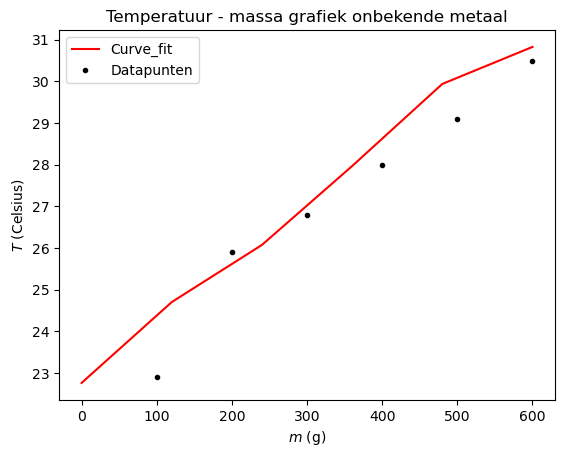

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# arrays met meetdata
T_beg_m = np.array([65.3, 65.3, 65.3, 65.3, 65.3, 65.3])
T_beg_w = np.array([20.6, 20.7, 20.5, 20.6, 21.2, 20.6])
T_eind = np.array([22.9, 25.9, 26.8, 28.0, 29.1, 30.5])

# constante waarden
c_w = np.array([4187, 4187, 4187, 4187, 4187, 4187])  # J/(kg*K)
m_w = np.array([195.5, 201.3, 209.4, 201.0 , 200.6, 200.5]) #gram water
m_m = np.array([100, 200, 300, 400, 500, 600]) #gram metaal

#functie voor het berekenen van T_eind
def Teind(x, c_m):
    c_w, m_w, m_m, T_beg_w, T_beg_m = x
    return (c_w*m_w*T_beg_w + c_m*m_m*T_beg_m) / (c_w*m_w + c_m*m_m)

xdata = (c_w, m_w, m_m, T_beg_w, T_beg_m)

#curve_fit
pvar, pcov = curve_fit(Teind, xdata, T_eind)

print("De soortelijke warmte van het onbekende metaal is c_m =", pvar[0], "J/(kg*K)")

xfit = np.linspace(0,600,6)
y = Teind(xdata, pvar[0])

# Maken van de grafiek
plt.figure()
plt.xlabel('$m$ (g)')
plt.ylabel('$T$ (Celsius)')
plt.title("Temperatuur - massa grafiek onbekende metaal")
plt.plot(xfit, y, 'r-', label="Curve_fit")
plt.plot(m_m,T_eind,'k.', label="Datapunten")
plt.legend()
plt.show()




# Discussie en conclusie
Voor toekomstige experimenten ga ik nauwkeuriger meten, door beter op de temperatuur te letten, zodat de waarde van de soortelijke warmte beter wordt.
Ook zou betere en nauwkeurigere meetapparatuur meehelpen met het beter bepalen van de soortelijke warmte.

In [46]:
!git status






On branch main
Your branch and 'origin/main' have diverged,
and have 9 and 5 different commits each, respectively.
  (use "git pull" if you want to integrate the remote branch with yours)

You have unmerged paths.
  (fix conflicts and run "git commit")
  (use "git merge --abort" to abort the merge)

Changes to be committed:
	new file:   Content/Dit krijg ik niet weg

Unmerged paths:
  (use "git add/rm <file>..." as appropriate to mark resolution)
	deleted by us:   Content/Labs/cwater.ipynb

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    Content/Labs/druksensorijken.ipynb
	modified:   Warmtecapaciteit.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Content/PySim/5_druktemp-Copy1.ipynb
	Content/PySim/Untitled.ipynb
	Content/PySim/Untitled1.ipynb
	Figures/naam.png
	Untitled.ipynb

